In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import importlib
import clustering

importlib.reload(clustering);

In [162]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, random_state=2021, cluster_std=2)

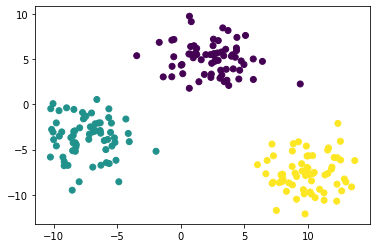

In [163]:
plt.scatter(X[:, 0], X[:, 1], c=y)

**k_means**

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=2021, stratify=y)

In [165]:
k_means = clustering.KMeans()

In [166]:
k_means.fit(X_train, 3, n_iters=10)

**Plot on actual data.**

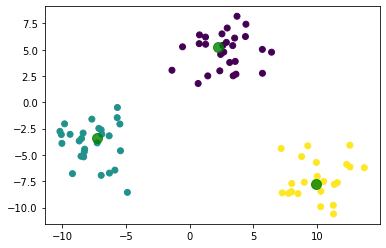

In [171]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c="green", s=100, alpha=0.8)

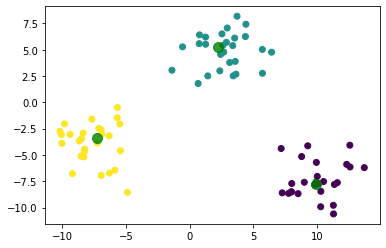

In [172]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=k_means.predict(X_test))
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c="green", s=100, alpha=0.8)

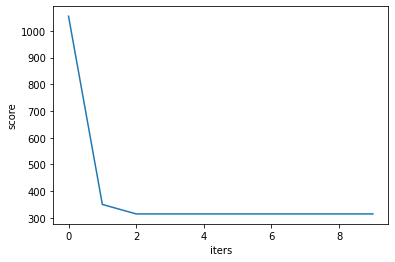

In [173]:
plt.plot(k_means.scores)
plt.ylabel("score")
plt.xlabel("iters")
plt.show()

**k_means++**

In [178]:
X, y = load_iris(return_X_y=True)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=2021, stratify=y)

In [180]:
k_means_pp = clustering.KMeansPlusPlus()
# k_means_pp._KMeansPlusPlus__init_alg(X, 3, clustering.DistMeasures.euclidean)
k_means_pp.fit(X_train, 3, n_iters=10)

Centroids in actual data points.

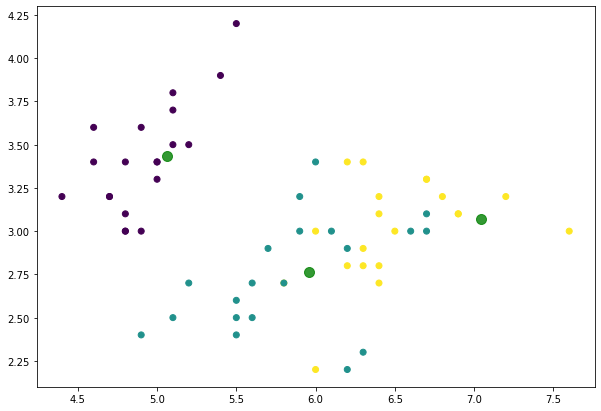

In [181]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.scatter(k_means_pp.cluster_centers_[:, 0], k_means_pp.cluster_centers_[:, 1], c="green", s=100, alpha=0.8)

Centroids in predicted clusters.

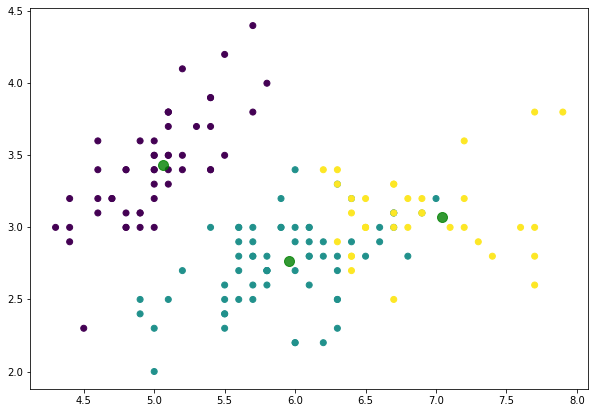

In [182]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=k_means_pp.predict(X))
plt.scatter(k_means_pp.cluster_centers_[:, 0], k_means_pp.cluster_centers_[:, 1], c="green", s=100, alpha=0.8)

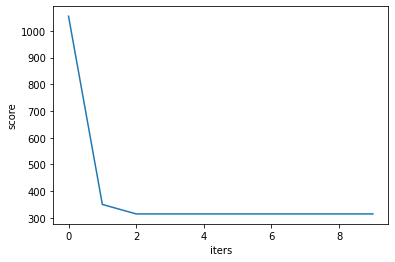

In [183]:
plt.plot(k_means.scores)
plt.ylabel("score")
plt.xlabel("iters")
plt.show()

Suppose we did not know that iris had 3 different flower types("3 different cluster.")

Let's find out what optimal k value we would select with cross-validation.

In [287]:
N_SPLITS = 5

folds = KFold(n_splits=N_SPLITS)
folds.shuffle = True

In [316]:
k_means_scores_dict = {}

for k in range(1, 60):
    
    k_means_train_scores = []
    k_means_test_scores = []

    for inds1, inds2 in folds.split(X, y):
        X_train, y_train = X[inds1], y[inds1]
        X_test, y_test = X[inds2], y[inds2]

        k_means = clustering.KMeansPlusPlus()
        k_means.fit(X_train, k, n_iters=15)
        
        dists = k_means.predict_dists(X_train)
        k_means_train_scores.append(np.sum(dists.min(axis=0)))
        dists = k_means.predict_dists(X_test)
        k_means_test_scores.append(np.sum(dists.min(axis=0)))
        
    k_means_scores_dict[k] = [k_means_train_scores, k_means_test_scores]

In [324]:
for k, v in k_means_scores_dict.items():
    print(f"For k = {k}, the average loss is (test) {np.array(v[0]).mean()}, (train) {np.array(v[1]).mean()}")

For k = 1, the average loss is (test) 233.1083416303667, (train) 58.55878380764064
For k = 2, the average loss is (test) 102.54160384583659, (train) 25.9783890259824
For k = 3, the average loss is (test) 82.22001739227487, (train) 21.452286192569538
For k = 4, the average loss is (test) 70.90064598965303, (train) 18.552587532333927
For k = 5, the average loss is (test) 64.19878866183782, (train) 17.04178356508757
For k = 6, the average loss is (test) 62.054954086380086, (train) 15.876752695630227
For k = 7, the average loss is (test) 61.06361188094051, (train) 16.52029641373589
For k = 8, the average loss is (test) 61.815037235094586, (train) 16.67353068822905
For k = 9, the average loss is (test) 60.26860073081838, (train) 16.177829445546188
For k = 10, the average loss is (test) 57.92861160036013, (train) 15.413670781753476
For k = 11, the average loss is (test) 54.46840648233122, (train) 15.10482075085227
For k = 12, the average loss is (test) 53.54249024164945, (train) 14.468336720

*Here we can choose K using the elbow method.*

Text(0, 0.5, 'RSS score')

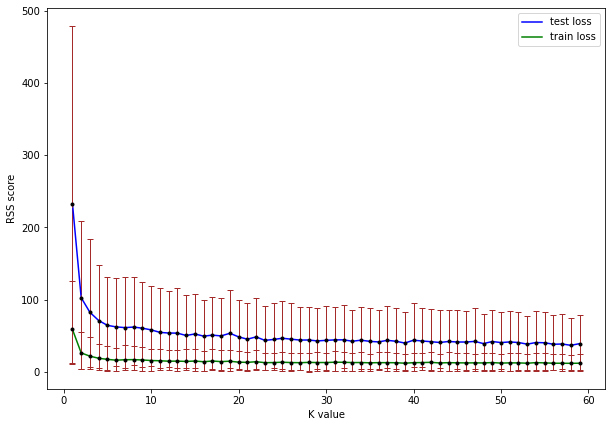

In [323]:
plt.figure(figsize=(10, 7))

plt.plot(k_means_scores_dict.keys(), 
         np.array(list(k_means_scores_dict.values()))[:, 0].mean(axis=1), color="blue")

plt.plot(k_means_scores_dict.keys(), 
         np.array(list(k_means_scores_dict.values()))[:, 1].mean(axis=1), color="green")

plt.legend(["test loss", "train loss"])

plt.errorbar(k_means_scores_dict.keys(),
             np.array(list(k_means_scores_dict.values()))[:, 0].mean(axis=1),
             [np.array(list(k_means_scores_dict.values()))[:, 0].min(axis=1),
             np.array(list(k_means_scores_dict.values()))[:, 0].max(axis=1)],
             0, fmt='.k', ecolor='brown', lw=1, capsize=3)

plt.errorbar(k_means_scores_dict.keys(),
             np.array(list(k_means_scores_dict.values()))[:, 1].mean(axis=1),
             [np.array(list(k_means_scores_dict.values()))[:, 1].min(axis=1),
             np.array(list(k_means_scores_dict.values()))[:, 1].max(axis=1)],
             0, fmt='.k', ecolor='brown', lw=1, capsize=3)

plt.xlabel("K value")
plt.ylabel("RSS score")

Here we took K up to (|x|\*0.5) - 1. We can see train and test losses continue to decrease, no matter how much we increase K. This behaviour is unlike other algorithms we discussed, where with growing model complexity we would overfit at some point.